### Newton Methods

### 定义测试函数

In [5]:
class Watson(object):
    def __init__(self, m):
        self.m = m
        
    def r(self,x,i):
        n = len(x)
        first = 0
        for j in range(2,n+1):
            first += (j-1) * x[j-1] * (i/29)**(j-2)

        second = 0
        for j in range(1,n+1):
            second += x[j-1] * (i/29)**(j-1)

        return first-second**2-1
        
    def calculate(self,x):        
        result = 0
        for i in range(1,self.m+1):
            result += self.r(x,i)**2
        return result
    
    def grad_r(self,x,i):
        grad_list = []
        n = len(x)
        ti = i/29
        second = 0
        for j in range(1,n+1):
            second += x[j-1] * ti**(j-1)
            
        for j in range(1,n+1):
            if j == 1:
                grad_list.append(-2*second)
            else:
                grad_list.append( (j-1)*ti**(j-2)-2*second*ti**(j-1) )
                
        return grad_list
        
    def gradient(self,x):
        import numpy as np
        Grad = None
        for i in range(1,self.m+1):
            temp = 2*self.r(x,i)*np.array(self.grad_r(x,i))
            if i == 1:
                Grad = temp
            else:
                for i,v in enumerate(temp):
                    Grad[i] += v
        return np.array(Grad)
    
    def hessian(self,x):
        import numpy as np
        n = len(x)
        H = np.zeros([n,n])
        for m in range(1,self.m+1):
            ti = m/29
            h = np.zeros([n,n])
            for i in range(n):
                for j in range(i,n):
                    temp1 = self.grad_r(x,m)
                    temp2 = self.r(x,m)
                    if i == j:
                        h[i,j] = 2*temp1[i]*temp1[j]+2*temp2*(-2*ti**(i-1+j-1))
                    else:
                        h[j,i] = 2*temp1[i]*temp1[j]+2*temp2*(-2*ti**(i-1+j-1))
                        h[i,j] = 2*temp1[i]*temp1[j]+2*temp2*(-2*ti**(i-1+j-1))
            H += h
        return H
    
    def plot(self,x=[-5,5],y=[-5,5]):
        import numpy as np
        import matplotlib.pyplot as plt
        X = np.arange(x[0],x[-1],0.1)
        Y = np.arange(y[0],y[-1],0.1)
        Z = np.zeros((len(X),len(Y)))
        for i in range(len(X)):
            for j in range(len(Y)):
                Z[i,j] = self.calculate([X[i],Y[j]])
        fig, ax = plt.subplots(figsize=(5,5),dpi=100)
        plt.rcParams['axes.unicode_minus']=False
        CS = ax.contourf(X, Y, Z)
        ax.set_title('contour of 2-dimensional watson')

class DiscreteBoundaryValue(object):
    def __init__(self, m):
        self.m = m
        
    def init_point(self):
        import numpy as np
        h = 1 / (self.m+1)
        init = []
        for i in range(1,self.m+1):
            ti = i*h
            init.append(ti*(ti-1))
        return np.array(init)
    
    def r(self,x,i):
        n = len(x)
        h = 1 / (n+1)
        if i == 1:
            return 2*x[i-1] - x[i] + h**2 * (x[i-1]+i*h+1)**3 / 2
        elif i == n:
            return 2*x[i-1] - x[i-2] + h**2 * (x[i-1]+i*h+1)**3 / 2
        else:
            return 2*x[i-1] - x[i-2] -x[i] + h**2 * (x[i-1]+i*h+1)**3 / 2
    
    def calculate(self,x):
        result = 0
        for i in range(1,self.m+1):
            result += self.r(x,i)**2
        return result
    
    def grad_r(self,x,i):
        grad_list = []
        n = len(x)
        h = 1/(n+1)
        ti = i*h
        for j in range(1,n+1):
            if j<i-1 or j>i+1:
                grad_list.append(0.)
            elif j == i-1:
                grad_list.append(-1.)
            elif j == i+1:
                grad_list.append(-1.)
            else:
                grad_list.append( 2.+(x[j-1]+ti+1) ** 2 / 2 * 3 * h **2 )
                
        return grad_list
        
    def gradient(self,x):
        import numpy as np
        Grad = None
        for i in range(1,self.m+1):
            temp = 2*self.r(x,i)*np.array(self.grad_r(x,i))
            if i == 1:
                Grad = temp
            else:
                for i,v in enumerate(temp):
                    Grad[i] += v
        return np.array(Grad)
    
    def hessian(self,x):
        import numpy as np
        n = len(x)
        h = 1 / (n+1)
        H = np.zeros([n,n])
        for m in range(1,self.m+1):
            ti = m*h
            for i in range(n):
                H[i,i] += 3*h**2 * (x[i]+ti+1)
        return H

    def plot(self,x=[-5,5],y=[-5,5]):
        import numpy as np
        import matplotlib.pyplot as plt
        X = np.arange(x[0],x[-1],0.1)
        Y = np.arange(y[0],y[-1],0.1)
        Z = np.zeros((len(X),len(Y)))
        for i in range(len(X)):
            for j in range(len(Y)):
                Z[i,j] = self.calculate([X[i],Y[j]])
        fig, ax = plt.subplots(figsize=(5,5),dpi=100)
        plt.rcParams['axes.unicode_minus']=False
        CS = ax.contourf(X, Y, Z)
        ax.set_title('contour of discrete binary value')

### 测试定义的函数

watson value: 661.1528713481628
grad of watson:
 [1190.93689778  726.83729381]
hessian of watson:
 [[3556.28029625 1364.77280741]
 [1364.77280741  901.09773909]]


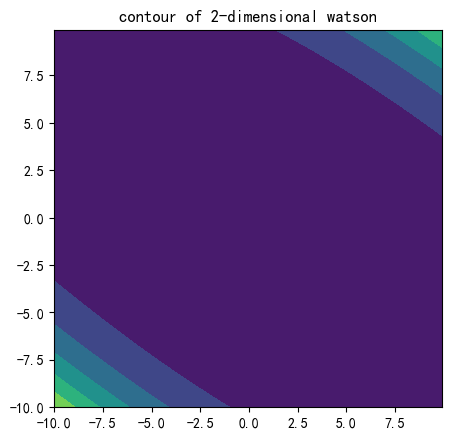

In [6]:
watson = Watson(31)
print('watson value:',watson.calculate([1,2]))
print('grad of watson:\n',watson.gradient([1,2]))
print('hessian of watson:\n',watson.hessian([1,2]))
watson.plot(x=[-10,10],y=[-10,10])

discrete binary value: 33.430583075073244
grad of discrete binary value:
 [-7.37349489 47.26101204]
hessian of discrete binary value:
 [[1.66666667 0.        ]
 [0.         2.33333333]]


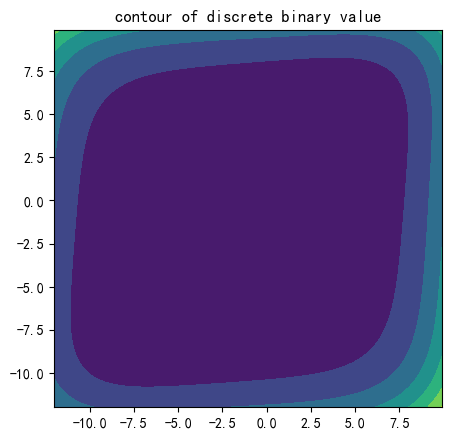

In [7]:
dbv = DiscreteBoundaryValue(2)
print('discrete binary value:',dbv.calculate([1,2]))
print('grad of discrete binary value:\n',dbv.gradient([1,2]))
print('hessian of discrete binary value:\n',dbv.hessian([1,2]))
dbv.plot(x=[-12,10],y=[-12,10])

### 定义优化函数
#### 1.Newton法

In [79]:
def BasicNewton(x0,loss):
    import numpy as np
    maxIter = 1000
    eps = 1.e-4
    x = x0
    for i in range(1,maxIter+1):
        gradient = loss.gradient(x)
        hessian = loss.hessian(x)
        inv_hessian = np.linalg.inv(hessian)
        
        if abs(np.linalg.det(inv_hessian)) < 1.e-6:
            print('Warning: Hessian矩阵不可逆！')
            break  
        elif np.all(np.linalg.eigvals(inv_hessian) > 0): 
            d = np.inner(inv_hessian,-gradient)
            x = x+d 
        else:
            print('Warning: Hessian矩阵非正定！')
            print('\t iter:',i,' x:',x,' loss:',loss.calculate(x))
            d = np.inner(inv_hessian,-gradient)
            x = x+d

        #print('iter:',i,' x:',x,' loss:',loss.calculate(x))
        if np.abs(loss.gradient(x)).max() < eps:
            break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [80]:
BasicNewton([0.,0.],watson)

迭代结束-iter: 407  x: [-0.60101559  1.0893466 ]  loss: 0.33219668614111714


In [81]:
BasicNewton(dbv.init_point(),dbv)

	 iter: 3  x: [-6.20291648  7.44040953]  loss: 4664.522643235498
	 iter: 4  x: [-146.13161878 -336.11948191]  loss: 4350424187912.7007
迭代结束-iter: 5  x: [-1.21859101e+07 -3.47516632e+08]  loss: 5.43636417539642e+48


#### 2.精确线搜索

In [106]:
def ExactLineSearch(x0,loss):
    import numpy as np
    maxIter = 1000
    eps = 1.e-4
    x = x0
    for i in range(1,maxIter+1):
        gradient = loss.gradient(x)
        hessian = loss.hessian(x)
        inv_hessian = np.linalg.inv(hessian)
        
        if abs(np.linalg.det(inv_hessian)) < 1.e-6:
            print('Warning: Hessian矩阵不可逆！')
            break  
        else:
            d = np.inner(inv_hessian,-gradient)
            step_size = np.inner(d,d) / (np.inner(d,np.inner(hessian,d)))
            x = x + step_size*d 

        if np.abs(loss.gradient(x)).max() < eps:
            break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [107]:
ExactLineSearch([0.,0.],watson)

迭代结束-iter: 1000  x: [-0.23240671  0.98011548]  loss: 2.603650377657193


In [108]:
ExactLineSearch(dbv.init_point(),dbv)

迭代结束-iter: 5  x: [  879.71213954 19876.06386197]  loss: 1.903951421530191e+23


#### 3.阻尼Newton方法

In [76]:
def StepSearch(loss,x,d,start=0.,end=3.,size=0.5,rho=0.2,sigma=0.5):
    import numpy as np
    '''根据Wolfe准则选择步长'''
    temp = []
    gradient = loss.gradient(x)
    for step in np.arange(start,end,size)[1:]:
        if loss.calculate(x+step*d) <= loss.calculate(x) + rho*np.inner(gradient,step*d) \
            and np.inner(loss.gradient(x+step*d),d) >= sigma*np.inner(gradient,d):
            temp.append(step)
    return temp

def DampedNewton(x0,loss):
    import numpy as np
    maxIter = 10000
    eps = 1.e-4
    x = x0
    for i in range(1,maxIter+1):
        gradient = loss.gradient(x)
        hessian = loss.hessian(x)
        inv_hessian = np.linalg.inv(hessian)
        d = np.inner(inv_hessian,-gradient)
        
        if abs(np.linalg.det(inv_hessian)) < 1.e-6:
            print('Warning: Hessian矩阵不可逆！')
            break  
        else:
            step = StepSearch(loss,x,d,-3.,3.)
            if len(step) == 0:
                step_size = 0.1
            else:
                step_size = np.random.choice(step)
            x = x + step_size*d 

        if np.abs(loss.gradient(x)).max() < eps:
            break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [15]:
DampedNewton([0.,0.],watson)

迭代结束-iter: 3844  x: [-0.60101558  1.0893466 ]  loss: 0.33219668614140296


In [16]:
DampedNewton(dbv.init_point(),dbv)

迭代结束-iter: 14  x: [-0.12823568 -0.15925601]  loss: 4.45894454167639e-10


#### 4.混合方法

In [8]:
def MixNewton(x0,loss,eps1=0.2,eps2=0.1):
    import numpy as np
    maxIter = 10000
    eps = 1.e-4
    x = x0
    for i in range(1,maxIter+1):
        gradient = loss.gradient(x)
        hessian = loss.hessian(x)
        inv_hessian = np.linalg.inv(hessian)
        d = np.inner(inv_hessian,-gradient)
        
        if abs(np.linalg.det(inv_hessian)) < 1.e-6:
            print('Warning: Hessian矩阵奇异，采用负梯度方向')
            print('\t iter:',i,' x:',x,' loss:',loss.calculate(x))
            d = -gradient
        elif np.inner(gradient,d) > eps1*np.linalg.norm(gradient)*np.linalg.norm(d):
            print('Warning: Hessian矩阵非正定，方向取反')
            print('\t iter:',i,' x:',x,' loss:',loss.calculate(x))
            d = -d
        elif np.abs(np.inner(gradient,d)) <= eps2*np.linalg.norm(gradient)*np.linalg.norm(d):
            print('Warning: 迭代方向几乎与负梯度方向正交，采用负梯度方向')
            print('\t iter:',i,' x:',x,' loss:',loss.calculate(x))
            d = -gradient
            
        step = StepSearch(loss,x,d)
        if len(step) == 0:
            step_size = 0.1
        else:
            step_size = np.random.choice(step)
        x = x + step_size*d 

        #print('iter:',i,' x:',x,' loss:',loss.calculate(x))
        if np.abs(loss.gradient(x)).max() < eps:
            break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [9]:
MixNewton([0.,0.],watson)

	 iter: 4  x: [-0.11616061  1.02836047]  loss: 5.1482902299902875
迭代结束-iter: 4013  x: [-0.60101559  1.0893466 ]  loss: 0.3321966861413223


In [11]:
MixNewton(dbv.init_point(),dbv)

迭代结束-iter: 15  x: [-0.12826628 -0.15928817]  loss: 1.4059365116221034e-09


#### 5.SR1方法

In [103]:
def SR1(x0,loss):
    import numpy as np
    maxIter = 1000
    eps = 1.e-4
    x = x0
    g = loss.gradient(x0)
    G = loss.hessian(x0)
    H = np.linalg.inv(G)
    for i in range(1,maxIter+1):
        if abs(np.linalg.det(H)) < 1.e-6:
            print('Warning:Hessian矩阵奇异！')
            break
        '''if np.all(np.linalg.eigvals(H) > 0) == False:
            print('Warning:矩阵非正定！')'''
        d = - np.inner(H,g)

        step = StepSearch(loss,x,d)
        if len(step) == 0:
            step_size = 0.01
        else:
            step_size = np.random.choice(step)

        s = step_size * d
        y = loss.gradient(x+s) - loss.gradient(x)
        u = s - np.inner(H,y).reshape(len(x),1)
        H += np.matmul(u,u.T) / np.inner(y,u.T)

        x = x + s
        g = loss.gradient(x)
        if loss.calculate(x) > 1.e+10:
            print('Warning:Hessian矩阵非正定导致溢出！')
            break
        if np.abs(g).max() < eps:
            break
        
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [104]:
SR1([0.,0.],watson)

迭代结束-iter: 282  x: [-7729.5705374  -1409.21906583]  loss: 1.6491225704573677e+17


In [105]:
SR1(dbv.init_point(),dbv)

迭代结束-iter: 655  x: [16920.292151    2782.56039842]  loss: 7.2462978293696435e+22


#### 6.DFP方法

In [39]:
def DFP(x0,loss):
    import numpy as np
    maxIter = 1000
    eps = 1.e-4
    x = x0
    n = len(x)
    g = loss.gradient(x0)
    G = loss.hessian(x0)
    H = np.linalg.inv(G)
    for i in range(1,maxIter+1):
        if abs(np.linalg.det(H)) < 1.e-6:
            print('Warning:Hessian矩阵奇异！')
            print('\t iter:',i,' x:',x,' loss:',loss.calculate(x))
            break
        else:
            d = - np.inner(H,g)

            step = StepSearch(loss,x,d)
            if len(step) == 0:
                step_size = 0.01
            else:
                step_size = np.random.choice(step)

            s = step_size * d
            y = loss.gradient(x+s) - loss.gradient(x)
            term1 = np.matmul(s.reshape(n,1),s.reshape(1,n)) / np.inner(s,y)
            term2 = - np.matmul(np.inner(H,y).reshape(n,1),np.inner(H,y).reshape(1,n)) / np.inner(y,np.inner(H,y))
            H = H + term1 + term2
            x = x + s
            g = loss.gradient(x)
            
            if np.abs(g).max() < eps:
                break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [40]:
DFP([0.,0.],watson)

迭代结束-iter: 25  x: [-0.60101876  1.08934844]  loss: 0.3321966859758604


In [41]:
DFP(dbv.init_point(),dbv)

迭代结束-iter: 8  x: [-0.12824808 -0.15926521]  loss: 7.576911875896969e-11


#### 7.BFGS

In [8]:
def BFGS(x0,loss):
    import numpy as np
    maxIter = 10000
    eps = 1.e-4
    x = x0
    n = len(x)
    g = loss.gradient(x0)
    B = loss.hessian(x0)
    for i in range(1,maxIter+1):
        if abs(np.linalg.det(B)) < 1.e-6:
            print('Warning:Hessian矩阵奇异！')
            print('\t iter:',i,' x:',x,' loss:',loss.calculate(x))
            break
        else:
            H = np.linalg.inv(B)
            d = - np.inner(H,g)

            step = StepSearch(loss,x,d)
            if len(step) == 0:
                step_size = 0.01
            else:
                step_size = np.random.choice(step)

            s = step_size * d
            y = loss.gradient(x+s) - loss.gradient(x)            
            term1 = np.matmul(y.reshape(n,1),y.reshape(1,n)) / np.inner(s,y)
            term2 = - np.matmul(np.inner(B,s).reshape(n,1),np.inner(B,s).reshape(1,n)) / np.inner(s,np.inner(B,s))
            B = B + term1 + term2
            x = x + s
            g = loss.gradient(x)
            
            if np.abs(g).max() < eps:
                break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [9]:
BFGS([0.,0.],watson)

迭代结束-iter: 12  x: [-0.6010153   1.08934519]  loss: 0.3321966862101118


In [33]:
BFGS(dbv.init_point(),dbv)

迭代结束-iter: 4  x: [-0.12824329 -0.15926622]  loss: 4.1545579143062214e-11


#### 8. Broyden族公式

In [45]:
def Broyden(x0,loss,phi):
    import numpy as np
    maxIter = 1000
    eps = 1.e-4
    x = x0
    n = len(x)
    g = loss.gradient(x0)
    B = loss.hessian(x0)
    H = H_DFP = H_BFGS = np.linalg.inv(B)
    for i in range(1,maxIter+1):
        if abs(np.linalg.det(H)) < 1.e-7:
            print('Warning:Hessian矩阵奇异！')
            break
        else:
            
            d = - np.inner(H,g)

            step = StepSearch(loss,x,d)
            if len(step) == 0:
                step_size = 0.01
            else:
                step_size = np.random.choice(step)

            s = step_size * d
            y = loss.gradient(x+s) - loss.gradient(x)
            term1 = np.matmul(s.reshape(n,1),s.reshape(1,n)) / np.inner(s,y)
            term2 = - np.matmul(np.inner(H,y).reshape(n,1),np.inner(H,y).reshape(1,n)) / np.inner(y,np.inner(H,y))
            H_DFP = H_DFP + term1 + term2
            
            term1 = (1+np.inner(y,np.inner(H,y))) / np.inner(y,s) * np.matmul(s.reshape(n,1),s.reshape(1,n)) / np.inner(s,y)
            term2 = - (np.matmul(np.matmul(s.reshape(n,1),y.reshape(1,n)),H) + np.matmul(H,np.matmul(y.reshape(n,1),s.reshape(1,n)))) / np.inner(s,y)
            H_BFGS = H_BFGS + term1 + term2
            
            H = (1-phi)*H_DFP + phi*H_BFGS
            x = x + s
            g = loss.gradient(x)
            
            if np.abs(g).max() < eps:
                break
    print('迭代结束-iter:',i,' x:',x,' loss:',loss.calculate(x))

In [46]:
Broyden([0.,0.],watson,0.5)

迭代结束-iter: 4  x: [-2622.69319645  3566.73502831]  loss: 183460821456514.03


In [47]:
Broyden(dbv.init_point(),dbv,0.5)

迭代结束-iter: 535  x: [-0.12824873 -0.1592717 ]  loss: 6.182713190068957e-11
